<a href="https://colab.research.google.com/github/jmk9/try/blob/main/mnist_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from keras import activations
from keras.models import Model
from keras.layers import *

import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_val, -1)
print('train image shape :', x_train.shape)
print('test image shape :', x_test.shape)

train image shape : (60000, 28, 28, 1)
test image shape : (9000, 28, 28, 1, 1, 1)


In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
input_size = (x_train.shape[1], x_train.shape[2], x_train.shape[3])
print(input_size)

(28, 28, 1)


In [ ]:
def CNN(input_size=(28,28,1)):
  inputs = Input(shape=input_size)

  conv1 = Conv2D(32, 3, activation='relu')(inputs)
  max1 = MaxPooling2D(pool_size=(2,2))(conv1)
  conv2 = Conv2D(64, 3, activation='relu')(max1)
  max2 = MaxPooling2D(pool_size=(2,2))(conv2)
  conv3 = Conv2D(128, 3, activation='relu')(max2)
  max3 = MaxPooling2D(pool_size=(2,2))(conv3)

  flatten = Flatten()(max3)

  dense1 = Dense(40, activation='relu')(flatten)
  dense2 = Dense(20, activation='relu')(dense1)
  dense3 = Dense(10, activation='softmax')(dense2)

  model = Model(inputs=inputs, outputs=dense3)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [ ]:
CNN_model = CNN()
CNN_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         7385

In [ ]:
batch_size = 64
epoch = 10

In [ ]:
CNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
CNN_history = CNN_model.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 52s 61ms/step - loss: 0.4298 - accuracy: 0.8637 - val_loss: 0.1306 - val_accuracy: 0.9620
Epoch 2/10
844/844 [==============================] - 52s 61ms/step - loss: 0.1134 - accuracy: 0.9655 - val_loss: 0.0737 - val_accuracy: 0.9767
Epoch 3/10
844/844 [==============================] - 52s 61ms/step - loss: 0.0785 - accuracy: 0.9763 - val_loss: 0.0547 - val_accuracy: 0.9848
Epoch 4/10
844/844 [==============================] - 52s 62ms/step - loss: 0.0606 - accuracy: 0.9809 - val_loss: 0.0523 - val_accuracy: 0.9837
Epoch 5/10
844/844 [==============================] - 53s 63ms/step - loss: 0.0482 - accuracy: 0.9846 - val_loss: 0.0443 - val_accuracy: 0.9870
Epoch 6/10
844/844 [==============================] - 54s 64ms/step - loss: 0.0415 - accuracy: 0.9869 - val_loss: 0.0419 - val_accuracy: 0.9880
Epoch 7/10
844/844 [==============================] - 53s 63ms/step - loss: 0.0357 - accuracy: 0.9881 - val_loss: 0.0413 - val_accuracy:

In [ ]:
def plot_learning_curve(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(15, 5))

    plt.subplot(121)
    plt.title('Training and validation accuracy')
    plt.plot(epochs, acc, '-', label='Training acc')
    plt.plot(epochs, val_acc, '-', label='Validation acc')
    plt.legend()

    plt.subplot(122)
    plt.title('Training and validation loss')
    plt.plot(epochs, loss, '-', label='Training loss')
    plt.plot(epochs, val_loss, '-', label='Validation loss')
    plt.legend()

    plt.show()

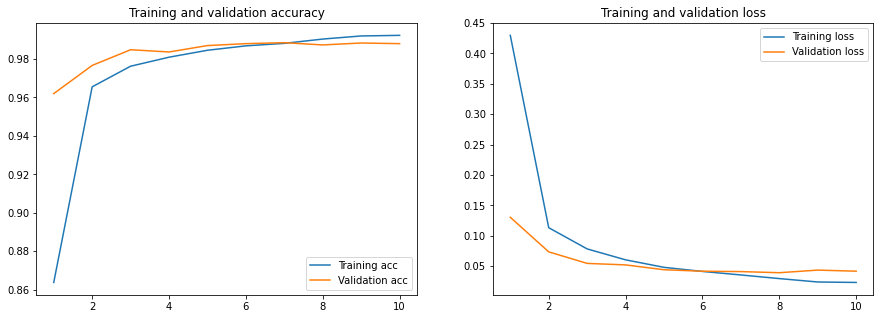

In [ ]:
plot_learning_curve(CNN_history)

In [ ]:
from sklearn.metrics import confusion_matrix

y_label = np.argmax(y_test, 1)
y_fit = np.argmax(CNN_model.predict(x_test), 1)

confusion_mat = confusion_matrix(y_label, y_fit)

In [ ]:
confusion_mat

array([[ 969,    1,    0,    0,    0,    3,    2,    2,    0,    3],
       [   0, 1130,    1,    1,    0,    1,    1,    1,    0,    0],
       [   2,    0, 1019,    2,    1,    0,    0,    6,    1,    1],
       [   0,    0,    1, 1005,    0,    2,    0,    1,    1,    0],
       [   3,    0,    1,    1,  951,    0,    5,    1,    1,   19],
       [   3,    0,    0,    6,    0,  881,    1,    1,    0,    0],
       [   5,    3,    1,    0,    2,    5,  941,    0,    1,    0],
       [   1,    8,   26,    2,    0,    1,    0,  980,    2,    8],
       [   0,    0,    2,    4,    0,    3,    0,    2,  959,    4],
       [   1,    1,    0,    0,    2,    5,    0,    1,    1,  998]])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_label, y_fit)
print('accuracy :', accuracy)

accuracy : 0.9833
